In [ ]:
#用随机森林回归填补缺失值
#sklearn.impute.SimpleImputer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer #填补缺失值
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
dataset = load_boston()
dataset.data.shape
#target是连续性变量的数据做回归

(506, 13)

In [3]:
X_full, y_full = dataset.data, dataset.target

In [4]:
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [6]:
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))

In [7]:
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)
#缺失少的话可以直接用rng.choice可以随机抽取不重复的随机数

In [8]:
X_missing = X_full.copy()
y_missing = y_full.copy()
X_missing[missing_samples,missing_features] = np.nan

In [9]:
X_missing = pd.DataFrame(X_missing)

In [10]:
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [11]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') #实例化
X_missing_mean = imp_mean.fit_transform(X_missing) #fit+predicate >>>fit_transform
X_missing_mean

array([[3.62757895e+00, 1.80000000e+01, 1.11634641e+01, ...,
        1.85211921e+01, 3.52741952e+02, 4.98000000e+00],
       [2.73100000e-02, 0.00000000e+00, 1.11634641e+01, ...,
        1.85211921e+01, 3.96900000e+02, 9.14000000e+00],
       [2.72900000e-02, 1.07229508e+01, 7.07000000e+00, ...,
        1.85211921e+01, 3.52741952e+02, 1.29917666e+01],
       ...,
       [3.62757895e+00, 1.07229508e+01, 1.19300000e+01, ...,
        2.10000000e+01, 3.52741952e+02, 5.64000000e+00],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.93450000e+02, 6.48000000e+00],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.85211921e+01, 3.96900000e+02, 7.88000000e+00]])

In [13]:
pd.DataFrame(X_missing_mean).isnull().sum() #check empty

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [12]:
imp_0 = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)
X_missing_0

array([[0.0000e+00, 1.8000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 0.0000e+00,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 0.0000e+00, 3.9690e+02,
        7.8800e+00]])

In [14]:
X_missing_reg = X_missing.copy()

In [15]:
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values #找出数据集中缺失值从小到大特征的排序 argsort返回的是索引


In [16]:
for i in sortindex:
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df[df!=fillc],pd.DataFrame(y_full)])
    df_0 = SimpleImputer(missing_values=np.nan,
                        strategy = 'constant', fill_value=0).fit_transform(df)
    
    Ytrain = fillc[fillc.notnull()] #选中要填充的特征中存在的值
    Ytest = fillc[fillc.isnull()] #需要所带的索引
    Xtrain = df_0[Ytrain.index,:] #非空值对应的记录
    Xtest = df_0[Ytest.index,:]
    
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain,Ytrain)
    Ypredict = rfc.predict(Xtest) #覆盖Ytest
    
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict
    

In [17]:
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.013444,18.0,4.5663,0.0,0.53800,5.30330,65.200,4.090000,1.0,296.00,14.277,12.7513,4.9800
1,0.027310,0.0,4.5757,0.0,0.46900,5.09413,78.900,4.967100,2.0,302.58,14.437,396.9000,9.1400
2,0.027290,0.0,7.0700,0.0,0.39441,7.18500,61.100,4.012500,2.0,242.00,13.667,9.6756,10.5891
3,0.013437,0.0,4.5838,0.0,0.45800,5.28535,45.800,4.009953,5.0,222.00,18.700,11.3281,10.5739
4,0.013845,0.0,2.1800,0.0,0.39488,7.14700,32.130,4.010600,5.0,301.40,18.700,9.5656,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.013453,0.0,4.5907,0.0,0.57300,5.08395,69.100,4.016439,1.0,301.29,21.000,10.8312,9.6700
502,0.045270,0.0,11.9300,0.0,0.57300,6.12000,76.700,2.287500,1.0,273.00,13.940,396.9000,9.0800
503,0.013733,0.0,11.9300,0.0,0.57300,6.97600,91.000,4.019106,5.0,301.34,21.000,8.4254,5.6400
504,0.109590,0.0,11.9300,0.0,0.57300,5.28935,89.300,4.016617,1.0,301.35,21.000,393.4500,6.4800


In [20]:
X_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [18]:
X = [X_full, X_missing_mean, X_missing_0, X_missing_reg]

mse = []

for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error', cv=5).mean()
    mse.append(scores*(-1))


In [19]:
mse

[21.571667100368845,
 40.848037216676374,
 49.626793201980185,
 40.981067421355064]

In [20]:
[*zip(['X_full','X_missing_mean','X_missing_0','X_missing_reg'],mse)]

[('X_full', 21.571667100368845),
 ('X_missing_mean', 40.848037216676374),
 ('X_missing_0', 49.626793201980185),
 ('X_missing_reg', 40.981067421355064)]

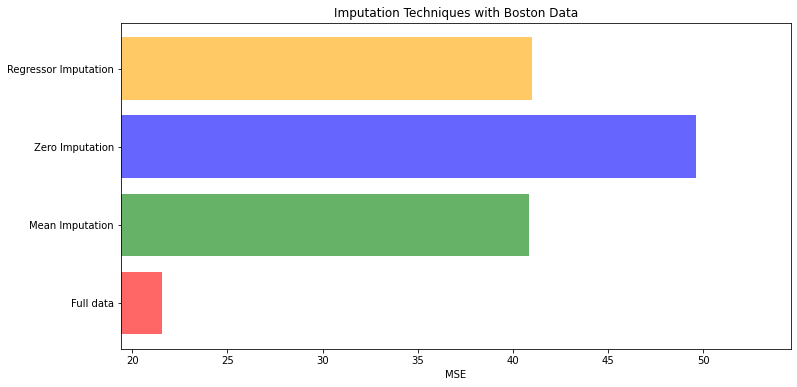

In [21]:
x_labels = ['Full data',
            'Mean Imputation',
            'Zero Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
            right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()